In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:

df.info()

df.describe()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

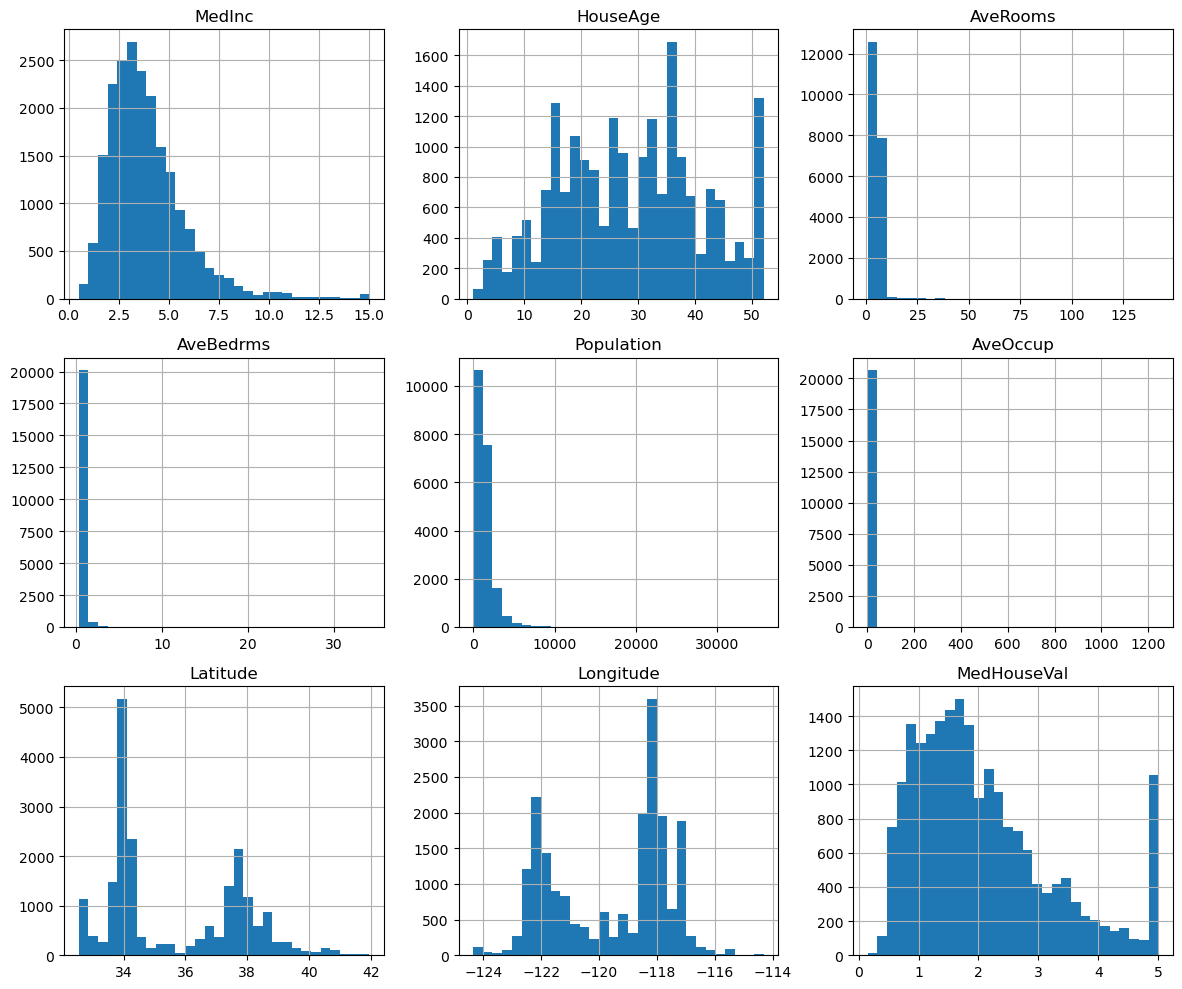

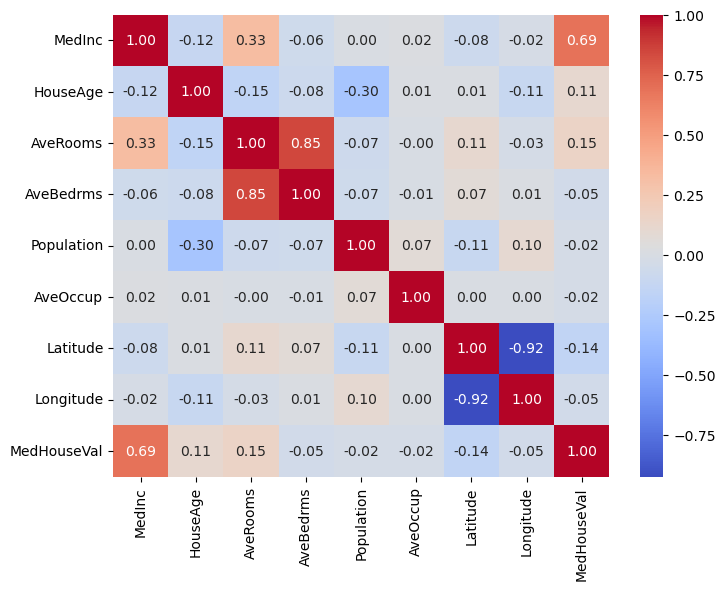

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

 
df.hist(bins=30, figsize=(12,10))
plt.tight_layout()
plt.show()

 
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
 
 
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

 
skewed = ["AveRooms", "AveBedrms", "Population", "AveOccup"]
X[skewed] = X[skewed].apply(np.log1p)

 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

X_train.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,1.794698,0.696352,7.741099,1.545819,32.71,-117.03
8267,3.8125,49.0,1.699926,0.713442,7.181592,1.007263,33.77,-118.16
17445,4.1563,4.0,1.893990,0.685679,6.820016,1.314587,34.66,-120.48
14265,1.9425,36.0,1.610001,0.709907,7.257708,1.608311,32.69,-117.11
2271,3.5542,43.0,1.983539,0.758097,6.774224,1.193922,36.78,-119.80


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])


pipeline.fit(X_train, y_train)


y_train_pred = pipeline.predict(X_train)
y_test_pred  = pipeline.predict(X_test)


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train   = r2_score(y_train, y_train_pred)

rmse_test  = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test    = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {rmse_train:.3f}, R²: {r2_train:.3f}")
print(f" Test RMSE: {rmse_test:.3f}, R²: {r2_test:.3f}")


Train RMSE: 0.673, R²: 0.661
 Test RMSE: 0.683, R²: 0.644


In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

 
ridge_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])

 
param_grid = {
    "ridge__alpha": [0.01, 0.1, 1, 10, 100]
}

 
grid = GridSearchCV(
    ridge_pipeline,
    param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

 
grid.fit(X_train, y_train)

print("Best alpha:", grid.best_params_["ridge__alpha"])
print("CV RMSE:", -grid.best_score_)

 
y_test_ridge = grid.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_ridge))
r2_ridge   = r2_score(y_test, y_test_ridge)
print(f"Ridge Test RMSE: {rmse_ridge:.3f}, R²: {r2_ridge:.3f}")


Best alpha: 0.1
CV RMSE: 0.6734361043297359
Ridge Test RMSE: 0.683, R²: 0.644


In [9]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("RF Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("RF Test R²:", r2_score(y_test, y_pred_rf))


RF Test RMSE: 0.5054558384974517
RF Test R²: 0.8050336887846058


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

 
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

 
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf   = r2_score(y_test, y_pred_rf)

print(f"RF Test RMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}")


RF Test RMSE: 0.505, R²: 0.805


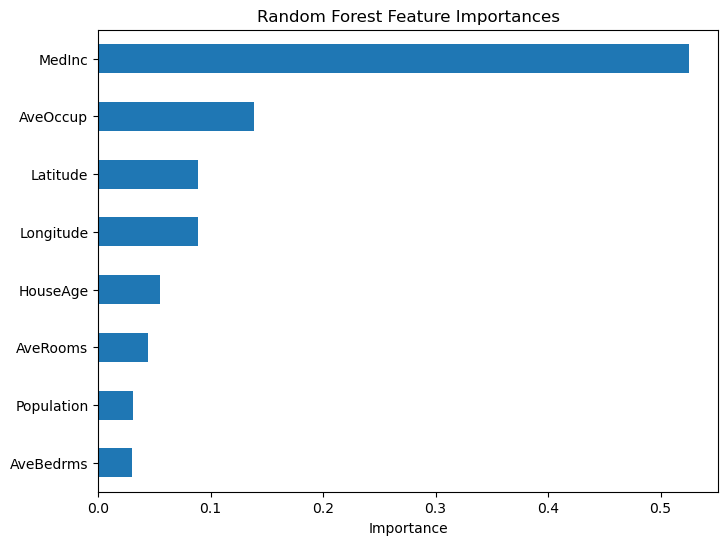

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(8,6))
importances.plot(kind="barh")
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.show()


In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "n_estimators": randint(50, 300),
    "max_depth": randint(5, 30),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 10)
}


search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=42,
    n_jobs=-1
)


search.fit(X_train, y_train)


print("Best Parameters:", search.best_params_)
best_rf = search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned   = r2_score(y_test, y_pred_tuned)
print(f"Tuned RF Test RMSE: {rmse_tuned:.3f}, R²: {r2_tuned:.3f}")


Best Parameters: {'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 141}
Tuned RF Test RMSE: 0.505, R²: 0.806
